# Classification model using KNNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_98_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,SYT10,TARBP2,TAS1R3,TAT,TRAV41,TRIM43B,VN2R17P,XPC,ZNF608,ZNF746
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.82797,29.60417,26.87053,22.27506,22.22154,21.9744,21.12857,32.24472,34.46991,29.11848
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,23.53072,29.61188,26.87283,22.27506,22.22154,21.9744,21.12857,32.15619,34.95662,30.78421
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.82797,31.90343,23.88665,27.71190,22.22154,21.9744,21.12857,31.86536,32.73029,31.98340
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,31.50567,30.35424,25.66465,22.27506,22.22154,21.9744,21.12857,31.63561,33.92535,30.68180
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,27.75696,31.60946,27.41015,22.27506,22.22154,21.9744,21.12857,33.12717,33.16473,30.01943


In [3]:
X = data.iloc[:,27:125]
Y=[]
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

         ABHD5  AC005307.1  AC005550.3  AC090957.2      AGAP3  AP001055.6  \
0    30.497897   21.055379   21.270652   21.030369  32.969805   22.028180   
1    31.269076   21.055379   21.270652   21.030369  32.303016   22.028180   
2    32.103159   21.055379   21.270652   21.030369  31.523937   22.028180   
3    31.860291   21.055379   21.270652   21.030369  32.234884   22.028180   
4    31.130802   21.055379   21.270652   21.030369  33.158813   22.028180   
..         ...         ...         ...         ...        ...         ...   
176  32.097191   20.944668   20.782537   20.962109  33.553554   20.515641   
177  33.549605   20.944668   20.782537   20.962109  32.424865   24.317471   
178  32.023461   20.944668   22.065655   20.962109  33.420634   20.515641   
179  30.836938   20.944668   21.846195   20.962109  33.432114   23.692971   
180  31.554782   20.944668   23.384450   20.962109  33.223246   20.515641   

     AP003025.2     AQP7P4   ATP5G2P1       AVIL  ...     SYT10    TARBP2  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 3 and is: 0.5676


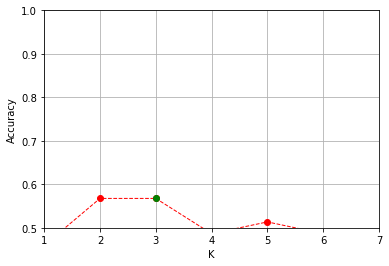

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000001402F2B1940>,
                     n_neighbors=3)

### 6. Predictions

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,1
2,0,1,1
3,1,0,1
4,0,1,0


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters:0.46576354679802956
Best result of the cross validation of the model (manhattan) with the best paramters:0.5908866995073891


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.8055555555555556
Final accuracy on the testing dataset (manhattan): 0.5945945945945946


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[48 20]
 [ 8 68]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        68
           1       0.77      0.89      0.83        76

    accuracy                           0.81       144
   macro avg       0.81      0.80      0.80       144
weighted avg       0.81      0.81      0.80       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 8  9]
 [ 6 14]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.61      0.70      0.65        20

    accuracy                           0.59        37
   macro avg       0.59      0.59      0.58        37
weighted avg       0.59      0.59      0.59        37

